In [11]:
import math
import matplotlib.pyplot as plt
from PIL import Image
import urllib

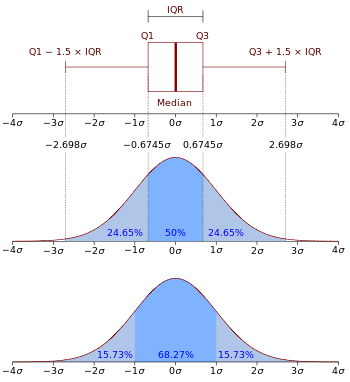

In [17]:
im = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/350px-Boxplot_vs_PDF.svg.png'))
im

if f(x) = 3/4 *(x^2+1)  for 0<=x<=1
1. Find p(x>=1.1)
2. Find p(0.4<x<0.92)

In [18]:
def probabilityDensityFunction(func):
    def pdf(lowerlimit,upperlimit):
        sub_interval = 1000
        step_size = (upperlimit-lowerlimit)/sub_interval
        integration = func(upperlimit) + func(lowerlimit)
        for i in range(1,sub_interval):
            if i%3==0:
                integration+=func(i*step_size+lowerlimit)*2
            else:
                integration+=func(i*step_size+lowerlimit)*3
        integration=integration*step_size*3/8
        return integration
    return pdf

In [19]:
@probabilityDensityFunction
def function(x):
    if(x>=0 and x<=1):
        return 3/4*(x**2+1)
    return 0

In [24]:
# 1. Find p(x>=1.1)
function(1.1,100) #100 acts as infinity

0.0

In [25]:
# 2. Find p(0.4<x<0.92)
function(0.4,0.92)

0.5684920226483939

## Solved

if f(x) = 3/4 *(x^2+1)  for 0<=x<=1
1. Find p(x>=1.1)
2. Find p(0.4<x<0.92)

In [28]:
@probabilityDensityFunction
def func(x):
    if x>=0 and x<=1:
        return 60* x**3 * (1-x)**2
    return 0

In [29]:
#1. Find p(x>=1.1)
func(1.1,1000)

0.0

In [30]:
# 2. Find p(0.4<x<0.92)
func(0.4,0.92)

0.8122487649599982

## solved

Mathematical Expectation or simple expectation of random variable of x
1. Arithmetic Mean
2. Variance

In [48]:
class MathematicalExpectation:
    def __init__(self,func,lowerlimit,upperlimit):
        self.func = func
        self.lowerlimit = lowerlimit
        self.upperlimit = upperlimit
    
    def ProbabilityDistribution(self,x):
        sub_interval = 1000
        step_size = (x-self.lowerlimit)/sub_interval
        integration = self.func(x) + self.func(self.lowerlimit)
        for i in range(1,sub_interval):
            if i%3==0:
                integration+=self.func(i*step_size+self.lowerlimit)*2
            else:
                integration+=self.func(i*step_size+self.lowerlimit)*3
        integration=integration*step_size*3/8
        return integration
    
    def MathematicalExpectation(self):
        sub_interval = 1000
        step_size = (self.upperlimit-self.lowerlimit)/sub_interval
        integration = self.upperlimit * self.func(self.upperlimit) + self.lowerlimit * self.func(self.lowerlimit)
        for i in range(1,sub_interval):
            if i%3==0:
                integration+= self.func(i*step_size+self.lowerlimit)*2 * (i*step_size+self.lowerlimit)
            else:
                integration+= self.func(i*step_size+self.lowerlimit)*3 * (i*step_size+self.lowerlimit)
        integration=integration*step_size*3/8
        return integration
    
    def Variance(self):
        sub_interval = 1000
        step_size = (self.upperlimit-self.lowerlimit)/sub_interval
        integration = self.upperlimit**2 * self.func(self.upperlimit) + self.lowerlimit**2 * self.func(self.lowerlimit)
        for i in range(1,sub_interval):
            if i%3==0:
                integration+= self.func(i*step_size+self.lowerlimit)*2 * (i*step_size+self.lowerlimit)**2
            else:
                integration+= self.func(i*step_size+self.lowerlimit)*3 * (i*step_size+self.lowerlimit)**2
        integration=integration*step_size*3/8 - self.MathematicalExpectation()**2
        return integration
        
    

In [49]:
def func(x):
    if x>=0 and x<=1:
        return 3/4*(x**2+1)
    return 0
d = MathematicalExpectation(func,0,1)

In [50]:
d.ProbabilityDistribution(0.4)

0.315913012002

In [51]:
d.ProbabilityDistribution(0.6)

0.5038470405067494

In [52]:
d.MathematicalExpectation()

0.5621253750936568

In [54]:
d.Variance()

0.08364062539441569